### Data Preprocessing


In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# read csv file
df = pd.read_csv("./Datasets/train_strokes.csv")


In [3]:
# display dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
# drop "id" column
df.drop(['id'], axis=1, inplace=True)

In [5]:
df
## key:
# gender: will use one hot encoder
## hypertension: 0 no hypertension, 1 yes hypertension
## heart_disease: 0 no heart diseases, 1 yes heart disease
## work_type: will use one hot encoder
## residence_type: will use one hot encoder
## avg_glucose_level: 
    ## use normal distribution
## smoking_status: will use one hot encoder
## Stroke:  0 = no stroke, 1 = stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [6]:
# see how many pt had a stroke
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [7]:
#https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column         value                  
Residence_type Rural             21644
               Urban             21756
ever_married   No                15462
               Yes               27938
gender         Other                11
               Male              17724
               Female            25665
smoking_status smokes             6562
               formerly smoked    7493
               never smoked      16053
work_type      Never_worked        177
               Govt_job           5440
               children           6156
               Self-employed      6793
               Private           24834

### Drop 'Other' value in 'gender' column

In [8]:
# see how many "other" values are and how many had a stroke
df[(df['gender'] == 'Other') & (df['stroke'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [9]:
# Drop 'other' gender - we do not know the premise of that selection 
# and no one with the gender 'other' had a stroke
df = df[df.gender != 'Other']
print(f"{df['gender'].value_counts()}")

Female    25665
Male      17724
Name: gender, dtype: int64


In [10]:
# merge 'children' and 'Never_worked' categories
df = df.replace({'work_type': {'Never_worked':'Never_worked', 'children': 'Never_worked'}})

In [11]:
#https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column         value                  
Residence_type Rural             21638
               Urban             21751
ever_married   No                15456
               Yes               27933
gender         Male              17724
               Female            25665
smoking_status smokes             6561
               formerly smoked    7487
               never smoked      16051
work_type      Govt_job           5438
               Never_worked       6331
               Self-employed      6793
               Private           24827

### Replace null values in 'bmi' and 'smoking status' columns


In [12]:
for column in df:
    print(df[column].isnull().value_counts())

False    43389
Name: gender, dtype: int64
False    43389
Name: age, dtype: int64
False    43389
Name: hypertension, dtype: int64
False    43389
Name: heart_disease, dtype: int64
False    43389
Name: ever_married, dtype: int64
False    43389
Name: work_type, dtype: int64
False    43389
Name: Residence_type, dtype: int64
False    43389
Name: avg_glucose_level, dtype: int64
False    41931
True      1458
Name: bmi, dtype: int64
False    30099
True     13290
Name: smoking_status, dtype: int64
False    43389
Name: stroke, dtype: int64


In [13]:
# see how many nan in 'bmi' are attributing to strokes
#140 of 783
df[(df['bmi'].isna()) & (df['stroke'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
407,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
747,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
1139,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
1613,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
42530,Male,66.0,0,0,Yes,Self-employed,Urban,182.89,NaN,never smoked,1
42839,Female,67.0,1,0,Yes,Govt_job,Urban,234.43,NaN,never smoked,1
43007,Female,69.0,0,1,Yes,Self-employed,Rural,89.19,NaN,smokes,1
43100,Male,67.0,0,0,Yes,Self-employed,Urban,136.79,NaN,smokes,1


In [14]:
# check data type
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
df = df.fillna(0)

df[(df['bmi'] == 0) & (df['stroke'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
407,Female,59.0,0,0,Yes,Private,Rural,76.15,0.0,0,1
747,Male,78.0,0,1,Yes,Private,Urban,219.84,0.0,0,1
1139,Male,57.0,0,1,No,Govt_job,Urban,217.08,0.0,0,1
1613,Male,58.0,0,0,Yes,Private,Rural,189.84,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
42530,Male,66.0,0,0,Yes,Self-employed,Urban,182.89,0.0,never smoked,1
42839,Female,67.0,1,0,Yes,Govt_job,Urban,234.43,0.0,never smoked,1
43007,Female,69.0,0,1,Yes,Self-employed,Rural,89.19,0.0,smokes,1
43100,Male,67.0,0,0,Yes,Self-employed,Urban,136.79,0.0,smokes,1


In [16]:
#https://stackoverflow.com/questions/39690742/convert-float-to-int-and-leave-nulls
#df['b'] = df['b'].astype('Int64')

df['bmi'] = df['bmi'].values.astype(int)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,Never_worked,Rural,95.12,18,0,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17,0,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,Never_worked,Urban,58.64,20,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33,never smoked,0


In [17]:
# check to see how many 0's are in the 'bmi' column
df[(df['bmi'] == 0) & (df['stroke'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0,never smoked,1
407,Female,59.0,0,0,Yes,Private,Rural,76.15,0,0,1
747,Male,78.0,0,1,Yes,Private,Urban,219.84,0,0,1
1139,Male,57.0,0,1,No,Govt_job,Urban,217.08,0,0,1
1613,Male,58.0,0,0,Yes,Private,Rural,189.84,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
42530,Male,66.0,0,0,Yes,Self-employed,Urban,182.89,0,never smoked,1
42839,Female,67.0,1,0,Yes,Govt_job,Urban,234.43,0,never smoked,1
43007,Female,69.0,0,1,Yes,Self-employed,Rural,89.19,0,smokes,1
43100,Male,67.0,0,0,Yes,Self-employed,Urban,136.79,0,smokes,1


In [18]:
# check null values
# for i in df.columns:
#     x = df[i].isna().value_counts()
#     print("Column name is:",i,"and the amount of null values is:",x)

In [19]:
# Replace 'bmi' 0 values with mean of bmi
mean_bmi = np.round(df['bmi'].mean())
print(mean_bmi)

27.0


In [20]:
# Replace 'bmi' 0 values with mean of bmi
df['bmi'] = df['bmi'].replace(0, mean_bmi)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,Never_worked,Rural,95.12,18,0,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17,0,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,Never_worked,Urban,58.64,20,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33,never smoked,0


In [21]:
# All NaN werer replaced with 0, so we need to replace 0 in 'smoking_status' column to 'unknown'
df['smoking_status'] = df['smoking_status'].replace(to_replace=0, value="unknown") 

In [22]:
df[(df['smoking_status'] == 'unknown') & (df['stroke'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
407,Female,59.0,0,0,Yes,Private,Rural,76.15,27,unknown,1
426,Female,78.0,0,0,Yes,Private,Urban,58.57,24,unknown,1
747,Male,78.0,0,1,Yes,Private,Urban,219.84,27,unknown,1
1139,Male,57.0,0,1,No,Govt_job,Urban,217.08,27,unknown,1
1315,Male,82.0,0,1,Yes,Private,Rural,208.30,32,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
42110,Female,80.0,0,0,No,Private,Urban,222.87,27,unknown,1
42569,Male,60.0,0,0,Yes,Private,Urban,88.57,44,unknown,1
43051,Female,80.0,0,0,Yes,Self-employed,Rural,114.61,21,unknown,1
43130,Female,82.0,0,1,Yes,Self-employed,Urban,118.61,29,unknown,1


In [23]:
#https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column         value                  
Residence_type Rural             21638
               Urban             21751
ever_married   No                15456
               Yes               27933
gender         Male              17724
               Female            25665
smoking_status smokes             6561
               formerly smoked    7487
               unknown           13290
               never smoked      16051
work_type      Govt_job           5438
               Never_worked       6331
               Self-employed      6793
               Private           24827

In [24]:
# check if all null values are gone 
for column in df:
    print(df[column].isnull().value_counts())

False    43389
Name: gender, dtype: int64
False    43389
Name: age, dtype: int64
False    43389
Name: hypertension, dtype: int64
False    43389
Name: heart_disease, dtype: int64
False    43389
Name: ever_married, dtype: int64
False    43389
Name: work_type, dtype: int64
False    43389
Name: Residence_type, dtype: int64
False    43389
Name: avg_glucose_level, dtype: int64
False    43389
Name: bmi, dtype: int64
False    43389
Name: smoking_status, dtype: int64
False    43389
Name: stroke, dtype: int64


### Normalize integer attributes: 'age',  'avg_glucose_level', 'bmi' 

In [25]:
#https://www.geeksforgeeks.org/data-normalization-with-pandas/

In [26]:
# add normalized 'age' column
df['age_normalized'] = (df['age'] - df['age'].min())/(df['age'].max() - df['age'].min())
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_normalized
0,Male,3.0,0,0,No,Never_worked,Rural,95.12,18,unknown,0,0.035645
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39,never smoked,0,0.707031
2,Female,8.0,0,0,No,Private,Urban,110.89,17,unknown,0,0.096680
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35,formerly smoked,0,0.853516
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19,unknown,0,0.169922
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,Never_worked,Urban,58.64,20,never smoked,0,0.121094
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55,formerly smoked,0,0.682617
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28,formerly smoked,0,1.000000
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33,never smoked,0,0.487305


In [27]:
# add normalized 'avg_glucose_level' column
df['avg_glucose_level_normalized']=(df['avg_glucose_level']-df['avg_glucose_level'].min())/(df['avg_glucose_level'].max()-df['avg_glucose_level'].min())
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_normalized,avg_glucose_level_normalized
0,Male,3.0,0,0,No,Never_worked,Rural,95.12,18,unknown,0,0.035645,0.169964
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39,never smoked,0,0.707031,0.139631
2,Female,8.0,0,0,No,Private,Urban,110.89,17,unknown,0,0.096680,0.236772
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35,formerly smoked,0,0.853516,0.059479
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19,unknown,0,0.169922,0.450244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,Never_worked,Urban,58.64,20,never smoked,0,0.121094,0.015420
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55,formerly smoked,0,0.682617,0.671934
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28,formerly smoked,0,1.000000,0.156492
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33,never smoked,0,0.487305,0.187079


In [28]:
# add normalized bmi
df['bmi_normalized']=(df['bmi']-df['bmi'].min())/(df['bmi'].max()-df['bmi'].min())
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_normalized,avg_glucose_level_normalized,bmi_normalized
0,Male,3.0,0,0,No,Never_worked,Rural,95.12,18,unknown,0,0.035645,0.169964,0.091954
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39,never smoked,0,0.707031,0.139631,0.333333
2,Female,8.0,0,0,No,Private,Urban,110.89,17,unknown,0,0.096680,0.236772,0.080460
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35,formerly smoked,0,0.853516,0.059479,0.287356
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19,unknown,0,0.169922,0.450244,0.103448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,Never_worked,Urban,58.64,20,never smoked,0,0.121094,0.015420,0.114943
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55,formerly smoked,0,0.682617,0.671934,0.517241
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28,formerly smoked,0,1.000000,0.156492,0.206897
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33,never smoked,0,0.487305,0.187079,0.264368


In [29]:
# how many people did not have a stroke (0) vs how many people had a stroke (1)
df['stroke'].value_counts()

0    42606
1      783
Name: stroke, dtype: int64

In [30]:
# save csv

#df.to_csv('Datasets/train_stroke_data_cleaned.csv', index=False)

In [31]:
# df of people that have had strokes
stroke_df = df.loc[df['stroke'] == 1]

In [68]:
no_stroke_df = df.loc[df['stroke'] == 0]

In [70]:
viz_norm_no_stroke_df = df.drop(columns={'age', 'bmi','avg_glucose_level'})
viz_norm_no_stroke_df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_normalized,avg_glucose_level_normalized,bmi_normalized
0,Male,0,0,No,Never_worked,Rural,unknown,0,0.035645,0.169964,0.091954
1,Male,1,0,Yes,Private,Urban,never smoked,0,0.707031,0.139631,0.333333
2,Female,0,0,No,Private,Urban,unknown,0,0.096680,0.236772,0.080460
3,Female,0,0,Yes,Private,Rural,formerly smoked,0,0.853516,0.059479,0.287356
4,Male,0,0,No,Never_worked,Rural,unknown,0,0.169922,0.450244,0.103448
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,0,0,No,Never_worked,Urban,never smoked,0,0.121094,0.015420,0.114943
43396,Female,0,0,Yes,Govt_job,Urban,formerly smoked,0,0.682617,0.671934,0.517241
43397,Female,1,0,Yes,Private,Urban,formerly smoked,0,1.000000,0.156492,0.206897
43398,Male,0,0,Yes,Private,Urban,never smoked,0,0.487305,0.187079,0.264368


In [82]:
viz_df = stroke_df.drop(columns={'avg_glucose_level_normalized','bmi_normalized','age_normalized'})
viz_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,Male,67.0,0,1,Yes,Private,Urban,228.69,36,formerly smoked,1
81,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27,never smoked,1
141,Male,80.0,0,1,Yes,Private,Rural,105.92,32,never smoked,1
257,Female,49.0,0,0,Yes,Private,Urban,171.23,34,smokes,1
264,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
43148,Female,56.0,0,0,Yes,Private,Rural,83.27,32,smokes,1
43268,Male,69.0,0,0,Yes,Self-employed,Rural,97.36,28,unknown,1
43304,Female,80.0,0,0,Yes,Self-employed,Urban,75.91,26,never smoked,1
43318,Male,62.0,1,1,Yes,Private,Rural,77.97,31,formerly smoked,1


In [65]:
norm_viz_df = df.drop(columns={'age', 'bmi','avg_glucose_level'})
norm_viz_df = norm_viz_df[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'age_normalized',
       'avg_glucose_level_normalized', 'bmi_normalized','stroke']]

### Data Exploration

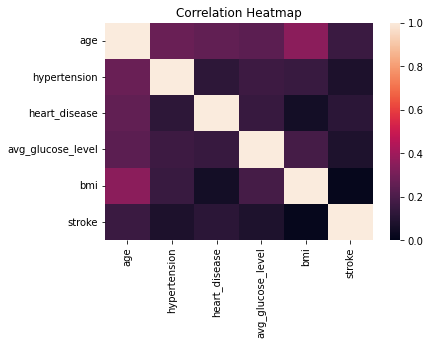

In [66]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#raw data.. only taking data with integers
heatmap = sns.heatmap(viz_df.corr(), vmin=0, vmax=1)
heatmap.set_title('Correlation Heatmap');


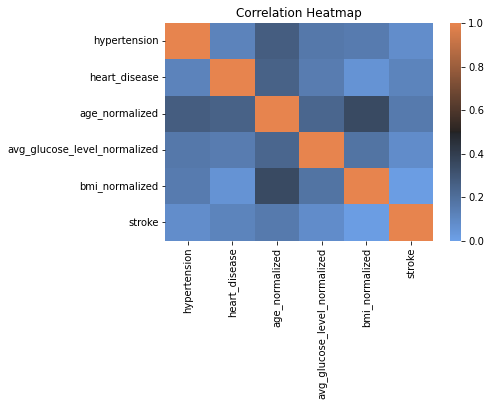

In [67]:
# heatmap with normalized data
color = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)


heatmap = sns.heatmap(norm_viz_df.corr(), vmin=0, vmax=1, cmap=color)

heatmap.set_title('Correlation Heatmap');


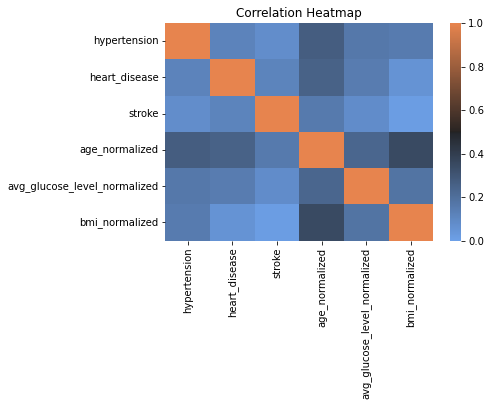

In [71]:
#pt without a stroke
# heatmap with normalized data
color = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)


heatmap = sns.heatmap(viz_norm_no_stroke_df.corr(), vmin=0, vmax=1, cmap=color)

heatmap.set_title('Correlation Heatmap');


### Age

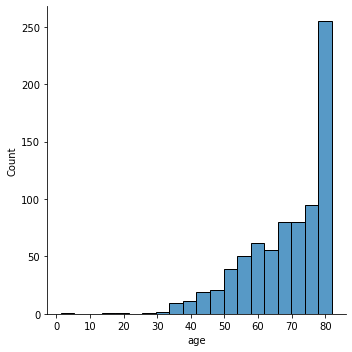

In [83]:
# age in df
viz_df['age'].nunique()
sns.displot(viz_df['age'])

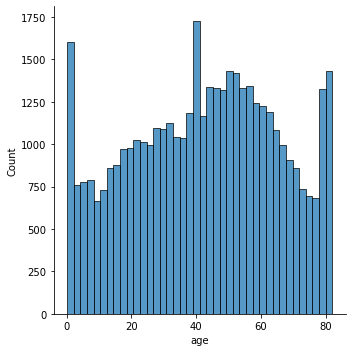

In [81]:
stroke_df['age'].nunique()
sns.displot(df['age'])

<AxesSubplot:xlabel='stroke', ylabel='age'>

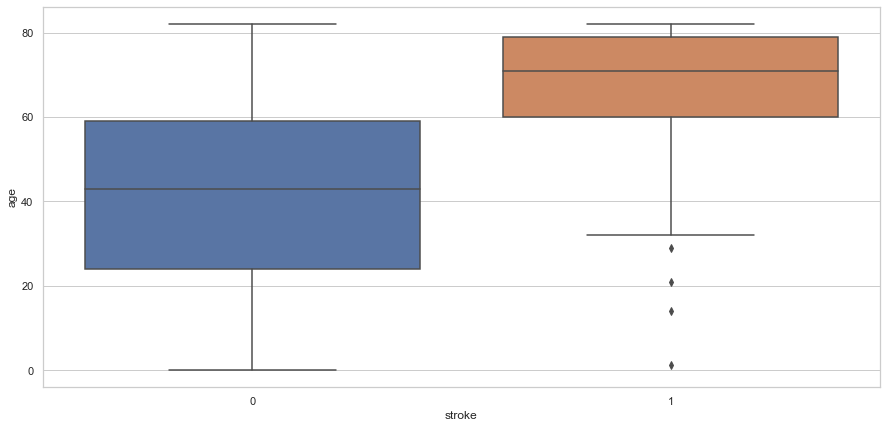

In [499]:
# ages of ppl who have had a stroke
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='stroke', y='age')

### BMI



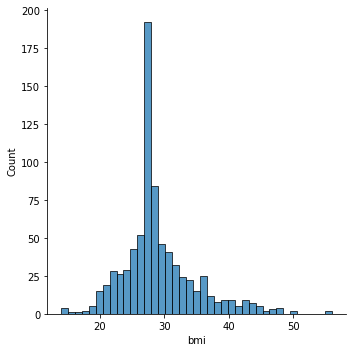

In [77]:
sns.displot(stroke_df['bmi'])

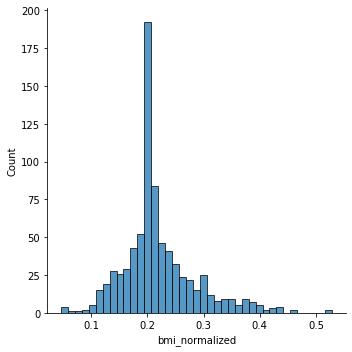

In [80]:
bmi_viz = sns.displot(stroke_df['bmi_normalized'])


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

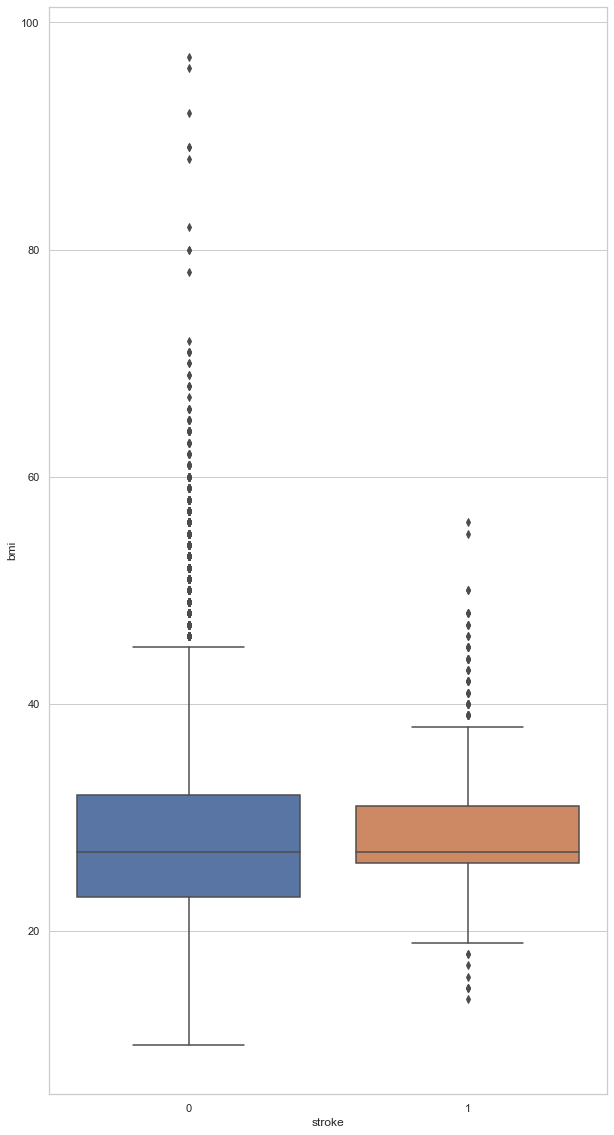

In [506]:
plt.figure(figsize=(10,20))
sns.boxplot(data=df, x='stroke', y='bmi')

### Average Glucose Level

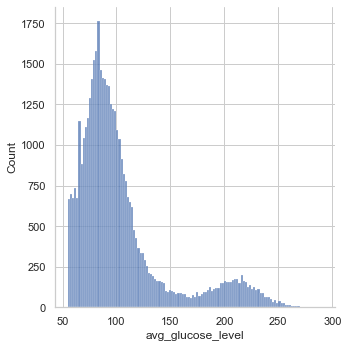

In [508]:
sns.displot(df['avg_glucose_level'])

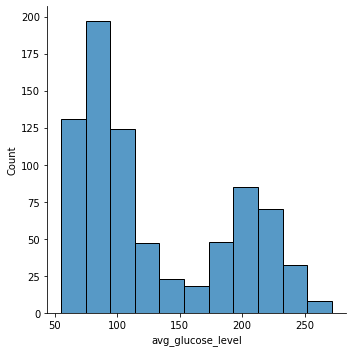

In [85]:
sns.displot(viz_df['avg_glucose_level'])

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

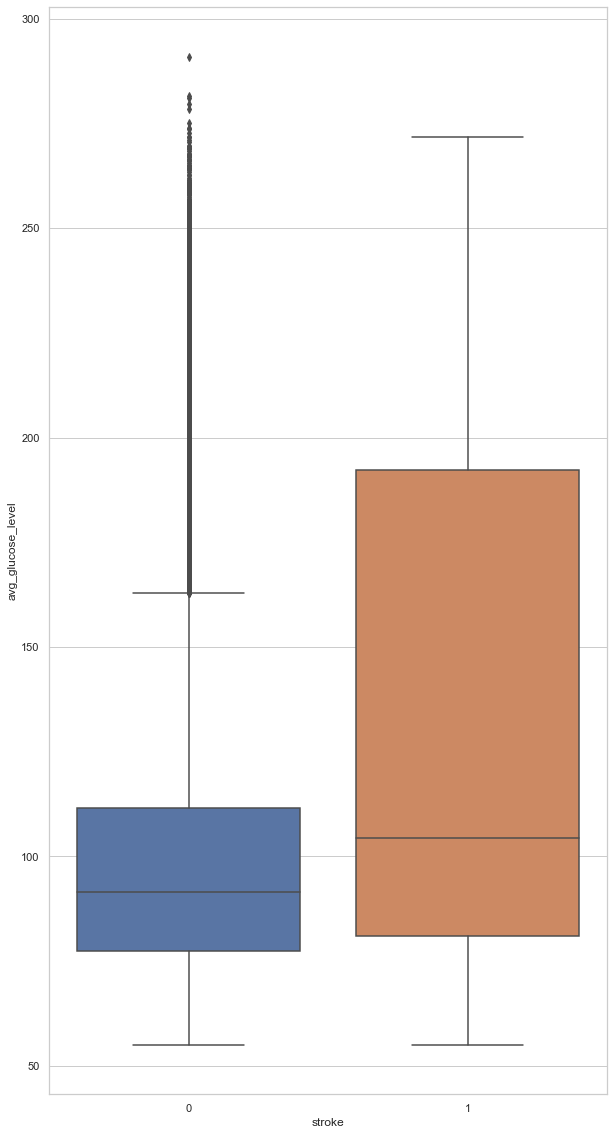

In [509]:
plt.figure(figsize=(10,20))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')

### Work Type

Text(0.5, 1.0, 'Work Type')

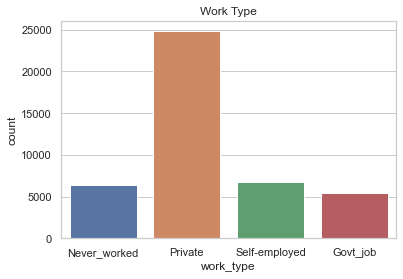

In [512]:
# count plots
countplot = sns.countplot(data=df,x='work_type')
countplot.set_title('Work Type')


Text(0.5, 1.0, 'Work Type of People with Strokes')

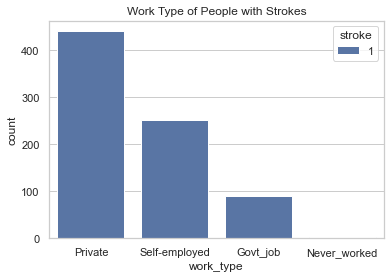

In [516]:
countplot_stroke = sns.countplot(data=stroke_df,x='work_type')
countplot_stroke.set_title('Work Type of of people who have had a stroke')


### Residence Type

Text(0.5, 1.0, 'Residence Type of People with Strokes')

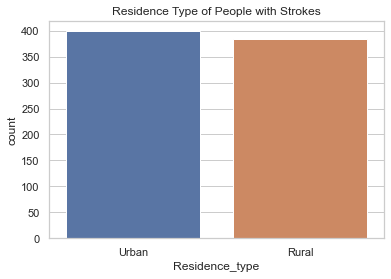

In [517]:
countplot_stroke = sns.countplot(data=stroke_df,x='Residence_type')
countplot_stroke.set_title('Residence Type of of people who have had a stroke')

### Smoking Status

Text(0.5, 1.0, 'Smoking Status of People who have had a stroke')

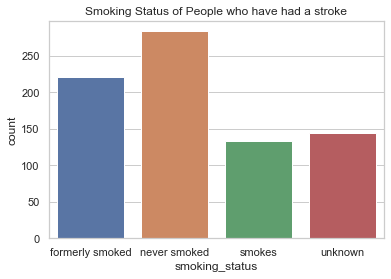

In [519]:
countplot_stroke = sns.countplot(data=stroke_df,x='smoking_status')
countplot_stroke.set_title('smoking status of people who have had a stroke')